In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#dataset exploration
df = pd.read_csv('kc_house_data.csv').iloc[:1000,2:]

print(df.info())
names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']

df = df[names]
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1000 non-null   float64
 1   bedrooms       1000 non-null   int64  
 2   bathrooms      1000 non-null   float64
 3   sqft_living    1000 non-null   int64  
 4   sqft_lot       1000 non-null   int64  
 5   floors         1000 non-null   float64
 6   waterfront     1000 non-null   int64  
 7   view           1000 non-null   int64  
 8   condition      1000 non-null   int64  
 9   grade          1000 non-null   int64  
 10  sqft_above     1000 non-null   int64  
 11  sqft_basement  1000 non-null   int64  
 12  yr_built       1000 non-null   int64  
 13  yr_renovated   1000 non-null   int64  
 14  zipcode        1000 non-null   int64  
 15  lat            1000 non-null   float64
 16  long           1000 non-null   float64
 17  sqft_living15  1000 non-null   int64  
 18  sqft_lot1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,3,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,3,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,3,0,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,5,910,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,3,0,1987,0,98074


In [3]:
#train/test data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['price'], test_size=0.3, random_state=1)
names_x_train = X_train.columns
len(X_train)

700

In [4]:
X_test.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,yr_renovated,zipcode
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.386667,2.034167,2069.326667,15465.986667,1.438333,3.480000,316.310000,1967.973333,93.206667,98073.836667
std,0.883037,0.727419,904.221944,30370.073731,0.491088,0.666644,458.239558,28.519534,421.993316,53.625700
min,1.000000,0.750000,380.000000,1058.000000,1.000000,2.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.000000,1.500000,1420.000000,5400.000000,1.000000,3.000000,0.000000,1950.000000,0.000000,98031.750000
50%,3.000000,2.125000,1935.000000,8249.500000,1.000000,3.000000,0.000000,1971.500000,0.000000,98058.000000
75%,4.000000,2.500000,2485.000000,11814.750000,2.000000,4.000000,591.000000,1992.000000,0.000000,98116.000000
max,6.000000,5.000000,6050.000000,262018.000000,3.000000,5.000000,2000.000000,2015.000000,2014.000000,98199.000000


In [5]:
#normalisation train data
x_train_mean = X_train.describe().loc['mean']
x_train_std = X_train.describe().loc['max'] - X_train.describe().loc['min']

#normalisation test data
x_test_mean  =  X_test.describe().loc['mean']
x_test_std = X_test.describe().loc['max'] - X_test.describe().loc['min']

for col in names_x_train:
    X_train[col] = (X_train[col] - x_train_mean[col])/x_train_std[col]
    
    X_test[col] = (X_test[col] - x_test_mean[col])/x_test_std[col]
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,yr_renovated,zipcode
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02
mean,1.663352e-17,-9.838360e-19,-7.464267e-18,1.060659e-18,1.728776e-17,-3.806479e-17,9.040387e-18,7.486075e-17,-7.137148e-19,3.275891e-14
std,1.197845e-01,1.439181e-01,1.562755e-01,9.008428e-02,2.114058e-01,1.747966e-01,2.174187e-01,2.461117e-01,1.906212e-01,2.633807e-01
min,-4.761224e-01,-4.101429e-01,-2.860684e-01,-4.361172e-02,-1.800000e-01,-6.142857e-01,-1.428363e-01,-6.097368e-01,-3.815222e-02,-3.716955e-01
25%,-4.755102e-02,-6.014286e-02,-1.140826e-01,-2.837858e-02,-1.800000e-01,-1.142857e-01,-1.428363e-01,-1.448246e-01,-3.815222e-02,-2.163925e-01
50%,-4.755102e-02,-1.014286e-02,-2.631662e-02,-2.014997e-02,-1.800000e-01,-1.142857e-01,-1.428363e-01,4.815789e-02,-3.815222e-02,-7.876623e-02
75%,9.530612e-02,8.985714e-02,7.430395e-02,-9.916430e-03,2.200000e-01,1.357143e-01,1.338627e-01,1.972807e-01,-3.815222e-02,2.141631e-01
max,5.238776e-01,5.898571e-01,7.139316e-01,9.563883e-01,8.200000e-01,3.857143e-01,8.571637e-01,3.902632e-01,9.618478e-01,6.283045e-01


In [6]:
X_train['ones'] = [1]*len(X_train)
X_train_one = pd.concat([X_train['ones'], X_train.iloc[:,:-1]], axis = 1)


X_test['ones'] = [1]*len(X_test)
X_test_one = pd.concat([X_test['ones'], X_test.iloc[:,:-1]], axis = 1)


In [11]:
#gradeint descent


def hipothesis_func(Q, x):
    h = sum(Q*x)
    return h

def cost_func(X, y, Q):
    m = len(X)
    J = 0
    for i in range(len(X)):
        J += (hipothesis_func(Q, X.iloc[i])-y.iloc[i])**2
    J = (1/2*m)*J
    return J


def derive_func(X, y, Q, column):
    m = len(X)
    J = 0
    J_deriv = 0
    for i in range(len(X)):
        J_deriv += (hipothesis_func(Q, X.iloc[i]) - y.iloc[i])*X_train_one.iloc[i][column] 
    J_deriv = (1/m)*J_deriv
    return J_deriv


a = 0.3
N = 100
#Q = np.array([1]*len(X_train_one.columns))

Q = np.array([ 521474, -411476,  345780, 1506429,  126782,  159673,   34814,  111672, -336617, -8674,   29020])
J_history = [0]*N
Q_new = np.array([1]*len(X_train_one.columns))
for k in range(N):
    m = len(X_train_one)
    for j in range(len(Q)):
        column = X_train_one.columns[j]
        J_deriv = derive_func(X_train_one, y_train, Q, column)
        Q_new[j] = Q[j] - a*J_deriv
    Q = Q_new
        
    #print(cost_func(X_train_one, y_train, Q) )
    J_history[k] = cost_func(X_train_one, y_train, Q) 
print(Q)


[ 521474 -428381  340572 1530668  119782  154622   34768  105200 -337423
   -9633   29741]


In [202]:
'''Q = ((np.linalg.inv((X_train_one.transpose()).dot(X_train_one))).dot(X_train_one.transpose())).dot(y_train)
Q'''

N = 200[ 521473  -75611  385045 1041050  144044  251685   58841  251341 -269462
   43277   19746]
N = 30 [ 521473 -113480  384711 1097126  150271  242825   54167  233193 -283428
   33212   20182]
N = 50 [ 521474 -219830  378632 1245802  157988  214614   43174  186422 -311996
   11621   22285]
N = 50 [ 521474 -262370  374185 1303372  156774  202682   39993  169096 -320036
    5348   23531]
N = 70 [ 521474 -311867  367333 1369963  151801  188595   37267  149627 -327445
    -556   25184]
N = 100 [ 521474 -365959  357259 1443225  141168  172998   35459  128905 -333361
   -5524   27203]

[ 521474 -411476  345780 1506429  126782  159673   34814  111672 -336617
   -8674   29020]



array([ 521474.02857143, -509129.35754949,  296340.72884603,
       1666433.3007051 ,   60071.65472153,  127684.61417405,
         35950.24619075,   70770.16775841, -335975.16771105,
        -12098.62734728,   33964.19173269])

In [ ]:
from flask import Flask, render_template, request
app = Flask(__name__)


@app.route('/')
def student():
   return render_template('index.html')

@app.route('/result', methods = ['post', 'get'])
def get_value():
    if request.method == 'POST':
        sqft_living = request.form.get('sqft_living')
        sqft_lot = request.form.get('sqft_lot')
        bedrooms = request.form.get('bedrooms')
        bathrooms = request.form.get('bathrooms')
        floors = request.form.get('floors')
        sqft_basement = request.form.get('sqft_basement')
        condition = request.form.get('condition')
        yr_built = request.form.get('yr_built')
        yr_renovated = request.form.get('yr_renovated')
        zipcode = request.form.get('zipcode')
        
        Q = np.array([ 521474., -428381.,  340572., 1530668.,  119782.,  154622.,   34768.,  105200., -337423., -9633.,   29741.])

        
        val_list = [float(bedrooms), float(bathrooms), float(sqft_living), float(sqft_lot), float(floors), float(condition), float(sqft_basement), float(yr_built), float(yr_renovated), float(zipcode)]
        val_list_norm = [1]
        for i in range(len(val_list)):
            val_list_norm.append((val_list[i] - x_test_mean[i])/x_test_std[i])
            
        val_list_array = np.array(val_list_norm)
        
        price = sum(Q*val_list_array)
        
        message = 'Запропонована вартість будинку становить {} $'.format(price)
        
        return render_template("untitled.html",result = message)


if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Dec/2020 14:37:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2020 14:37:23] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [20/Dec/2020 14:37:30] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2020 14:37:32] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [20/Dec/2020 14:38:16] "GET / HTTP/1.1" 200 -


In [12]:
y_res = [0]*len(X_test_one)

for ind in range(len(X_test_one)):
    y_res[ind] = hipothesis_func(Q, X_test_one.iloc[ind])

x_range = [0]*len(X_test_one)
for k in range(len(X_test_one)):
    x_range[k] = k
y_res


df_res = pd.DataFrame(data = {'y_actual':y_test, 'y_predicted':y_res, 'y_diff': abs(y_test - y_res)})
df_res.head(10)

,y_actual,y_predicted,y_diff
507,442000.0,282431.897878,159568.102122
818,682000.0,533061.374349,148938.625651
452,232000.0,215727.160471,16272.839529
368,785000.0,573422.943684,211577.056316
242,455000.0,483704.670795,28704.670795
929,390000.0,738360.311783,348360.311783
262,525000.0,622040.805775,97040.805775
810,345000.0,204470.838797,140529.161203
318,548000.0,518889.303400,29110.696600
49,1350000.0,841055.644133,508944.355867


In [13]:
from sklearn import metrics
print('Mean Absolure Error:', metrics.mean_absolute_error(df_res['y_actual'], df_res['y_predicted']))  
print('Mean Squered Error:', metrics.mean_squared_error(df_res['y_actual'], df_res['y_predicted']))  
print('VarScore:',metrics.explained_variance_score(df_res['y_actual'], df_res['y_predicted']))


Mean Absolure Error: 141014.331466592
Mean Squered Error: 37979283720.22836
VarScore: 0.5687254200312838


<IPython.core.display.Javascript object>


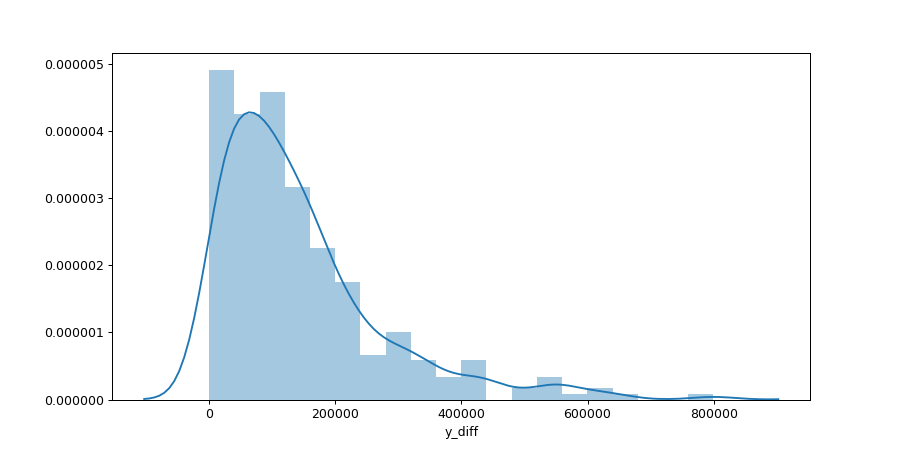

In [14]:
%matplotlib notebook

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
residuals = df_res['y_diff']
sns.distplot(residuals)

